In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth

import timeit
import ODE_utils as odeu
from scipy import optimize
import tables
#from mpmath import *
#!jt -t -cellw 100%

In [2]:
###Initial Values###

M0=1.0
Q=0.8
Lambda=0.01#0.1#0.14#0.1#0.1
scalarfield=True
A=.01#.115
vscalarfield=False


In [3]:
Tol=.125#.05
N=50
Nul=100
Nup=10**(60)
scal=2
uscal=10
umax=200
vmax=15
extraterms=True
rcosmtol=.0000000000000001

datatype=np.float64


#ru0=5.0
#dr0v=.4
ru0=2.0
#dr0v=0.045
dr0v=.5#0.5*(1-2*M0/ru0+Q**2.0/ru0**2.0-Lambda/3*ru0**2.0)#0.05#-1/(4*-.375)*(1-2*M0/ru0+Q**2/ru0**2-Lambda*ru0**2/3)
#dr0v=.075

bdytype="edd"
ubdytype="stan"
scaltostan=False
solveaffine=False

Elist=[1]
#Elist=[1,2,4,8,16]

#uloc=[1/8,1/4,3/8,1/2,5/8]
#uloc=[1/5,2/5,3/5,4/5,9/10]
uloc=[8.2/10]
print(dr0v)

0.5


In [4]:
###Defining Needed Constants###

scalf=float(scal)
u0=0.0
v0=0.0
rv0=ru0
phiu0=0.0
phiv0=0.0

if M0==0.0:
    dv0=1/N    
else:
    dv0=M0/N
    


def fr(r,M0,Q,Lambda):
    return 1-2*M0/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

if Lambda>0 or Lambda<0:
    sol = optimize.root(fr,[0.687,1.3,500.0],args=(M0,Q,Lambda), method='hybr')
    rminus=sol.x[0]
    rplus=sol.x[1]
    rcosm=sol.x[2]
else:
    rplus=M0+(M0**2-Q**2)**(.5)
    rminus=M0-(M0**2-Q**2)**(.5)
    rcosm=0.0
    

wHD=True 

print("r+: "+str(rplus))
print("r-: "+str(rminus))
print("rc: "+str(rcosm))

print("Max r along u=0: "+str(ru0+vmax*dr0v))
###Predicting Run time###

###timer
start = timeit.default_timer()

Nu=Nul*umax#int(umax/du0)
Nv=int(vmax/dv0)
#print("Number of points for lowest iteration is "+str(Nu*Nv)+","+str(Nu)+"X"+str(Nv))
print("Number of points for highest iteration is "+str(Nu*Nv*max(Elist)**2)+","+str(Nu*max(Elist))+"X"+str(Nv*max(Elist)))

numpoints=Nu*Nv

print("Total number of points is "+str(int(numpoints)))

predtime=numpoints/(1700000)

print("Runtime: about "+str(format(predtime/60,'.2f'))+" minutes")


r+: 1.6187804097264145
r-: 1.618780408733249
rc: 16.241471580916166
Max r along u=0: 9.5
Number of points for highest iteration is 15000000,20000X750
Total number of points is 15000000
Runtime: about 0.15 minutes


In [5]:
print((rplus-rminus)/(2*rminus)*rcosm/rminus)

3.0778053350039867e-09


In [6]:
##################################
###Applying Boundary Conditions###

Emax=max([Elist])


rnpf=np.zeros((2,Nv),dtype=datatype)
signpf=np.zeros((2,Nv),dtype=datatype)
phinpf=np.zeros((2,Nv),dtype=datatype)
drnpvf=np.zeros((2,Nv),dtype=datatype)
dsignpvf=np.zeros((2,Nv),dtype=datatype)
dphinpvf=np.zeros((2,Nv),dtype=datatype)
drnpuf=np.zeros((2,Nv),dtype=datatype)
dsignpuf=np.zeros((2,Nv),dtype=datatype)
dphinpuf=np.zeros((2,Nv),dtype=datatype)
massnpf=np.full((2,Nv),M0)#np.zeros((2,Nv))
#drunpv=np.full((1,Nv-1),-1/(4*dr0v)*(1-2*M0/ru0+Q**2/ru0**2))
 


rnpf[0], signpf[0], phinpf[0] , drnpvf[0], dsignpvf[0], dphinpvf[0], drnpuf[0], dsignpuf[0], dphinpuf[0] , massnpf[0]= odeu.boundaryv(scal,ubdytype,bdytype,Nv,ru0,dr0v,dv0,vmax,M0,Q,Lambda,scalarfield,A,rcosmtol,datatype)


mask=~np.isnan(rnpf[0])
#print(mask)
rnpf=rnpf[:,mask]
#print(rnpf)
Nv=int(len(rnpf[0]))
rnpf=rnpf.reshape(2,Nv)
signpf=signpf[:,mask]#.reshape(2,Nv)
phinpf=phinpf[:,mask]#.reshape(2,Nv)
dphinpuf=dphinpuf[:,mask]#.reshape(2,Nv)  
dphinpvf=dphinpvf[:,mask]#.reshape(2,Nv)
dsignpuf=dsignpuf[:,mask]#.reshape(2,Nv)
dsignpvf=dsignpvf[:,mask]#.reshape(2,Nv)
drnpuf=drnpuf[:,mask]#.reshape(2,Nv)
drnpvf=drnpvf[:,mask]#.reshape(2,Nv)
massnpf=massnpf[:,mask]#.reshape(2,Nv)

#print(massnpf)

750
[ 2.          2.01011176  2.02044937  2.03101593  2.04181449  2.05284804
  2.06411956  2.07563194  2.08738804  2.09939066  2.11164253  2.12414633
  2.13690465  2.14992003  2.16319494  2.17673174  2.19053274  2.20460016
  2.21893614  2.23354271  2.24842183  2.26357536  2.27900506  2.2947126
  2.31069955  2.32696737  2.34351741  2.36035094  2.3774691   2.39487295
  2.4125634   2.43054128  2.44880731  2.46736209  2.48620612  2.50533976
  2.5247633   2.5444769   2.56448059  2.58477432  2.60535792  2.62623111
  2.64739349  2.66884458  2.69058377  2.71261037  2.73492355  2.75752243
  2.78040598  2.8035731   2.82702259  2.85075317  2.87476344  2.89905191
  2.923617    2.94845702  2.97357012  2.99895437  3.0246077   3.05052797
  3.07671292  3.10316025  3.1298676   3.15683258  3.18405279  3.21152582
  3.23924928  3.26722076  3.29543786  3.32389818  3.3525993   3.38153875
  3.41071403  3.44012256  3.46976172  3.49962876  3.52972087  3.56003512
  3.59056852  3.62131796  3.65228028  3.68345227

In [7]:
print(rnpf)
print(len(rnpf))
print(Nv)
print(signpf)

[[ 2.          2.01011176  2.02044937 ... 15.96506446 15.96693647
  15.9687959 ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
2
750
[[-1.91959284 -1.89741178 -1.87541467 ... -3.59119464 -3.59793408
  -3.60467448]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


750 750 15.0
750


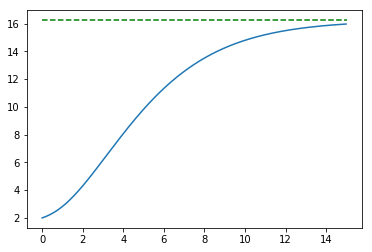

1.0004886689604195 16.2408757098363
-0.01075555555555556


In [8]:
vmax=(Nv)*dv0

print(Nv,len(rnpf[0]),vmax)

vrange=np.arange(0,vmax-.00000001*vmax,dv0)#*rnpf[0])/rnpf[0]
print(len(vrange))
#print(vrange)
        
plt.plot(vrange,rnpf[0])
#plt.plot(dphinpvf[0])
#plt.plot(dphinpuf[0])
Mc=np.nanmax(massnpf[0])
rcosm=odeu.rc(Mc,Q,Lambda)
plt.plot([0,vmax],[rcosm,rcosm],linestyle='--',color='green')
plt.show()



#print(vrange)
print(Mc,rcosm)
print(drnpuf[0,0])


In [ ]:
drunptemp=np.empty((Nv))*np.nan
#dsigunp=np.empty((Nu))*np.nan


A=.115
u1=9.5
u2=10

###Applying Propagation Algorithm###

urange=np.array([0.0],dtype=datatype)

massnpf[0][0]=1.0

#drunp[0]=-mth.exp(signpf[0][0])/(4.0*dr0v)*(1-2*M0/ru0+Q**2.0/ru0**2.0-Lambda*ru0**2/3)
#dsigunpvalue=100*np.exp(np.nanmax(signpf))
#drunptemp=drunp[0]
    

i=0
icount=0
dv=dv0
if M0>0:
    du0=M0/Nul
elif M0==0:
    du0=1/Nul

du=du0

###fix this part (put in front of boundary conditions so it is an initial condition)
#if bdytype=="edd" or bdytype=="fulledd":
    #bdyvalue=1.0
    #dsignpuf[0]=2*(3*Q**2-3*M0*ru0+ru0**4*Lambda)/(ru0*(-3*Q**2+ru0*(6*M0-3*ru0+ru0**3*Lambda)))*drunp[0]
    #dsigunp[0]=2.0*(M0*rnpf[0]-Q**2.0)/(rnpf[0]*(Q**2.0+rnpf[0]*(-2*M0+rnpf[0])))*drunp[0]
#else:
    #bdyvalue=0.0
    #dsigunp[0]=0.0
######
    
atom = tables.Float64Atom()

rnpfile = tables.open_file('rnp.h5', mode='w',encoding="utf8") 
rnp = rnpfile.create_earray(rnpfile.root, 'data', atom, (0, Nv))

signpfile = tables.open_file('signp.h5', mode='w',encoding="utf8") 
signp = signpfile.create_earray(signpfile.root, 'data', atom, (0, Nv))
phinpfile = tables.open_file('phinp.h5', mode='w',encoding="utf8") 
phinp = phinpfile.create_earray(phinpfile.root, 'data', atom, (0, Nv))
massnpfile = tables.open_file('massnp.h5', mode='w',encoding="utf8") 
massnp = massnpfile.create_earray(massnpfile.root, 'data', atom, (0, Nv))

if extraterms==True:
    drnpufile = tables.open_file('drnpu.h5', mode='w',encoding="utf8") 
    drnpu = drnpufile.create_earray(drnpufile.root, 'data', atom, (0, Nv))
    drnpvfile = tables.open_file('drnpv.h5', mode='w',encoding="utf8") 
    drnpv = drnpvfile.create_earray(drnpvfile.root, 'data', atom, (0, Nv))
    dsignpufile = tables.open_file('dsignpu.h5', mode='w',encoding="utf8") 
    dsignpu = dsignpufile.create_earray(dsignpufile.root, 'data', atom, (0, Nv))
    dsignpvfile = tables.open_file('dsignpv.h5', mode='w',encoding="utf8") 
    dsignpv = dsignpvfile.create_earray(dsignpvfile.root, 'data', atom, (0, Nv))
    dphinpufile = tables.open_file('dphinpu.h5', mode='w',encoding="utf8") 
    dphinpu = dphinpufile.create_earray(dphinpufile.root, 'data', atom, (0, Nv))
    dphinpvfile = tables.open_file('dphinpv.h5', mode='w',encoding="utf8") 
    dphinpv = dphinpvfile.create_earray(dphinpvfile.root, 'data', atom, (0, Nv))
    
    
 
#rtemp=rnpf[0]   
#print(rtemp)
rnp.append(rnpf[0].reshape(1,Nv))
signp.append(signpf[0].reshape(1,Nv))
phinp.append(phinpf[0].reshape(1,Nv))
massnp.append(massnpf[0].reshape(1,Nv))

#drunp=np.append(drunp,np.nan)
#dsigunp=np.append(dsigunp,np.nan)
#dphinpuf=np.append(dphinpuf,np.nan)
drunptemp=np.nanmax(np.abs(drnpuf[0]))     
dsigunpvalue=np.nanmax(np.abs(dsignpuf[0]))
dphiutemp=np.nanmax(np.abs(dphinpuf[0]))

rnpf[1][0]=rnpf[0][0]

i=0
TempTol=1 
TempTolv=1
Eres=False
while max(urange)<umax and i<2000000 and du>0.0: #and rnpf[1][0]>0.0 :

    
    du=du0*Tol*TempTol/np.nanmax([abs(dsigunpvalue),abs(drunptemp),abs(dphiutemp)])
    #du=du0*Tol*TempTol/max([abs(dsigunpvalue),abs(drunptemp),abs(dphiutemp)])

    
    if du<1/Nup*1.1:
        du=1/Nup
     
    
    if du>=1/Nul:
        #print('r='+str(rnpf[i][0]))
        if rnpf[1][0]<rplus:
            du=1/(1*Nul)
            #print(rplus)
        else:
            du=1/Nul
    

    #print("%.24f" % urange[i])
    #print("%.24f" % du)
    
    ###fix this section (dphinpuf is in the wrong form)
    #if urange[i]>u1 and urange[i]<u2 and vscalarfield==True:
        #u=urange[i]+du
        #phinpf[1][0]=A*64*(u-u1)**3.0*(u2-u)**3.0/(u2-u1)**6.0
        #dphinpuf[i]=192*A*(u-u1)**2.0*(u-u2)**2.0*(-2*u+u1+u2)/(u1-u2)**6.0 
    #else:
        #continue
        #phinpf[1][0]=0.0
        #dphinpuf[i+1]=0.0
    

    ###Predictor###
    drnpvf[1]=drnpvf[0]+du*odeu.Rfunc(drnpvf[0],drnpuf[0],rnpf[0],signpf[0],Q,Lambda)
    dsignpvf[1]=dsignpvf[0]+du*odeu.Sigfunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0],signpf[0],Q)
    dphinpvf[1]=dphinpvf[0]+du*odeu.Phifunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0])
    drnpuf[1]=drnpuf[0]+du*odeu.Coneq(drnpuf[0],dsignpuf[0],dphinpuf[0],rnpf[0])
    
    rnpf[1]=rnpf[0]+1/2*du*(drnpuf[0]+drnpuf[1])
    signpf[1]=signpf[0]+du*dsignpuf[0]
    phinpf[1]=phinpf[0]+du*dphinpuf[0]
    
    #if np.any(phinpf[1]): 
        #dsignpuf[1][0]=0.0
        #dphinpuf[1][0]=0.0
        #for j in range(0,Nv-1):
            #dphinpuf[1][j+1]=dphinpuf[1][j]+dv*odeu.Phifunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j],rnpf[1][j])         
            #dphinpuf[1][j+1]=dphinpuf[1][j]+1/2*dv*(odeu.Phifunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j],rnpf[1][j])+odeu.Phifunc(drnpvf[1][j+1],drnpuf[1][j+1],dphinpuf[1][j+1],dphinpvf[1][j+1],rnpf[1][j+1]))
            #dsignpuf[1][j+1]=dsignpuf[1][j]+dv*odeu.Sigfunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j], rnpf[1][j],signpf[1][j],Q)                                                                             
            #Phifuncnp=odeu.Phifunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1])
    #else:
        #dphinpuf[1]=0.0
    #dsignpuf[1][0]=0.0
    #dphinpuf[1][0]=0.0 
    #print(dsignpuf[1])
    #print(dphinpuf[1])
    if ubdytype=='stan':
        dsignpuf[1][0]=0.0  
    elif ubdytype=='adapt':
        dsignpuf[1][0]=-(signpf[1][-1]-np.log(drnpvf[1][-1])+3/2*np.log(2))
    
    dphinpuf[1]=1/(rnpf[1])*(rnpf[1][0]*dphinpuf[1][0]-1/2*dv*(np.cumsum(drnpuf[1]*dphinpvf[1]+np.roll(drnpuf[1]*dphinpvf[1],1))-(drnpuf[1][0]*dphinpvf[1][0]+np.roll(drnpuf[1]*dphinpvf[1],1)[0])))
    Sigfuncnp=odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q)
    dsignpuf[1]=dsignpuf[1][0]+1/2*dv*(np.cumsum(Sigfuncnp+np.roll(Sigfuncnp,1))-(Sigfuncnp[0]+np.roll(Sigfuncnp,1)[0]))
    
    #print(dsignpuf[1])
    #print(dphinpuf[1])
    
    ###Correction###
    drnpvf[1]=drnpvf[0]+1/2*du*(odeu.Rfunc(drnpvf[0],drnpuf[0],rnpf[0],signpf[0],Q,Lambda)+odeu.Rfunc(drnpvf[1],drnpuf[1],rnpf[1],signpf[1],Q,Lambda))
    dsignpvf[1]=dsignpvf[0]+1/2*du*(odeu.Sigfunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0],signpf[0],Q)+odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q))
    dphinpvf[1]=dphinpvf[0]+1/2*du*(odeu.Phifunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0])+odeu.Phifunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1]))
    drnpuf[1]=drnpuf[0]+1/2*du*(odeu.Coneq(drnpuf[0],dsignpuf[0],dphinpuf[0],rnpf[0])+odeu.Coneq(drnpuf[1],dsignpuf[1],dphinpuf[1],rnpf[1]))
    
    rnpf[1]=rnpf[0]+1/2*du*(drnpuf[0]+drnpuf[1])
    signpf[1]=signpf[0]+1/2*du*(dsignpuf[0]+dsignpuf[1])
    phinpf[1]=phinpf[0]+1/2*du*(dphinpuf[0]+dphinpuf[1])
    
    #########
    #if np.any(phinpf[1]): 
        #dsignpuf[1][0]=0.0
        #dphinpuf[1][0]=0.0
        #for j in range(0,Nv-1):
            #dphinpuf[1][j+1]=dphinpuf[1][j]+1/2*dv*(odeu.Phifunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j],rnpf[1][j])+odeu.Phifunc(drnpvf[1][j+1],drnpuf[1][j+1],dphinpuf[1][j+1],dphinpvf[1][j+1],rnpf[1][j+1]))         
            #dsignpuf[1][j+1]=dsignpuf[1][j]+1/2*dv*(odeu.Sigfunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j],rnpf[1][j],signpf[1][j],Q)+odeu.Sigfunc(drnpvf[1][j+1],drnpuf[1][j+1],dphinpuf[1][j+1],dphinpvf[1][j+1],rnpf[1][j+1],signpf[1][j+1],Q))    
    #else:
        #dphinpuf[1]=0.0
    #dsignpuf[1][0]=0.0
    #dphinpuf[1][0]=0.0
    ########
    
    
    dphinpuf[1]=1/(rnpf[1])*(rnpf[1][0]*dphinpuf[1][0]-1/2*dv*(np.cumsum(drnpuf[1]*dphinpvf[1]+np.roll(drnpuf[1]*dphinpvf[1],1))-(drnpuf[1][0]*dphinpvf[1][0]+np.roll(drnpuf[1]*dphinpvf[1],1)[0])))
    Sigfuncnp=odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q)
    dsignpuf[1]=dsignpuf[1][0]+1/2*dv*(np.cumsum(Sigfuncnp+np.roll(Sigfuncnp,1))-(Sigfuncnp[0]+np.roll(Sigfuncnp,1)[0]))

    #drnpvf[1]=drnpvf[0]+1/2*du*(odeu.Rfunc(drnpvf[0],drnpuf[0],rnpf[0],signpf[0],Q,Lambda)+odeu.Rfunc(drnpvf[1],drnpuf[1],rnpf[1],signpf[1],Q,Lambda))
    
    massnpf[1]=(1+4.0*np.exp(-signpf[1])*drnpuf[1]*drnpvf[1])*rnpf[1]/2.0+np.power(Q,2.0)/(2.0*rnpf[1])-Lambda*np.power(rnpf[1],3.0)/6.0
    
    #####
    
    drunptemp=np.nanmax(np.abs(drnpuf[1]))      
    dsigunpvalue=np.nanmax(np.abs(dsignpuf[1]))    
    dphiutemp=np.nanmax(np.abs(dphinpuf[1]))
    
    #if float(dsigunpvalue*du)>1000:#0.1:
        #TempTol=TempTol/2
        #Eres=True
    #else:
        
    
    icount+=1
    #print(icount,uscal)
    
    if icount==uscal:
        urange=np.append(urange,urange[i]+du)
        rnp.append(rnpf[1].reshape(1,Nv))
        signp.append(signpf[1].reshape(1,Nv))
        phinp.append(phinpf[1].reshape(1,Nv))
        massnp.append(massnpf[1].reshape(1,Nv))
        if extraterms==True:
            drnpu.append(drnpuf[1].reshape(1,Nv))
            drnpv.append(drnpvf[1].reshape(1,Nv))
            dsignpu.append(dsignpuf[1].reshape(1,Nv))
            dsignpv.append(dsignpvf[1].reshape(1,Nv))
            dphinpu.append(dphinpuf[1].reshape(1,Nv))
            dphinpv.append(dphinpvf[1].reshape(1,Nv))
        icount=0
        #drunp=np.append(drunp,np.nan)
        #dsigunp=np.append(dsigunp,np.nan)
        #dphinpuf=np.append(dphinpuf,np.nan)
        print("%.24f" % urange[i])
        print("%.24f" % du)
        print(drnpuf[1][-1])
        print(dsignpuf[1][-1])
        print(dsignpvf[1][-1])
        #print('--')
        #print(drnpvf[1][-1])
        #print(dsignpvf[1][-1])
        #print(dphinpvf[1][-1])
        #print('--')
        print(massnpf[1][-2])
        #print(dphinpuf[1][-1])
        print('---')
        i+=1
    else:
        urange[i]=urange[i]+du
    
    rnpf[0]=rnpf[1]
    phinpf[0]=phinpf[1]
    signpf[0]=signpf[1]
    drnpvf[0]=drnpvf[1]
    dsignpvf[0]=dsignpvf[1]
    dphinpvf[0]=dphinpvf[1]
    drnpuf[0]=drnpuf[1]
    dsignpuf[0]=dsignpuf[1]
    dphinpuf[0]=dphinpuf[1]
    #massnpf[0]=massnpf[1]
    
        
        
    #if Eres==True:
        #TempTol=2*TempTol
    #else:
        #TempTol=1
    #Eres=False
    
    
    
    

    #if rnpf[1][0]<0.0 or np.isnan(du):
        #break
   
   


0.089999999999999996669331
0.010000000000000000208167
-0.0020018462503172754
0.03132036120927387
-0.33703970312278086
1.000487868290171
---
0.190000000000000029976022
0.010000000000000000208167
-0.0020081356413556117
0.03141694184124102
-0.33703451803660905
1.0004878662148728
---
0.290000000000000091038288
0.010000000000000000208167
-0.002014464304205964
0.031514079037507414
-0.3370293166114553
1.000487864124704
---
0.390000000000000179856130
0.010000000000000000208167
-0.0020208325983795874
0.03161177756617414
-0.33702409874507316
1.0004878620195345
---
0.490000000000000268673972
0.010000000000000000208167
-0.0020272408877209545
0.03171004224990902
-0.33701886433427836
1.0004878598992395
---
0.590000000000000301980663
0.010000000000000000208167
-0.0020336895404725968
0.031808877966728814
-0.33701361327493723
1.0004878577636935
---
0.690000000000000390798505
0.010000000000000000208167
-0.002040178929341106
0.03190828965079636
-0.33700834546195535
1.000487855612766
---
0.790000000000000

6.489999999999906066250333
0.010000000000000000208167
-0.002501870552234675
0.03886406998388285
-0.3366699610062453
1.0004876993703666
---
6.589999999999903934622125
0.010000000000000000208167
-0.0025116309472235656
0.039008782532152717
-0.33666347625373094
1.0004876960292926
---
6.689999999999901802993918
0.010000000000000000208167
-0.002521466036437423
0.03915451070689342
-0.33665696611879076
1.0004876926621495
---
6.789999999999899671365711
0.010000000000000000208167
-0.0025313766570169358
0.03930126514828925
-0.33665043040668324
1.000487689268696
---
6.889999999999897539737503
0.010000000000000000208167
-0.0025413636584601888
0.03944905664561029
-0.33664386892047937
1.0004876858486913
---
6.989999999999895408109296
0.010000000000000000208167
-0.002551427902849242
0.03959789613983326
-0.3366372814610297
1.0004876824018876
---
7.089999999999893276481089
0.010000000000000000208167
-0.002561570265081685
0.03974779472631733
-0.3366306678269321
1.0004876789280335
---
7.189999999999891144

12.889999999999769642045067
0.010000000000000000208167
-0.00332204930841315
0.050736426257000145
-0.3361939608301583
1.0004874210862846
---
12.989999999999767510416859
0.010000000000000000208167
-0.00333898704837162
0.05097602373959841
-0.33618534151149554
1.0004874154638488
---
13.089999999999765378788652
0.010000000000000000208167
-0.0033560919185072675
0.05121777728034082
-0.33617667807734236
1.000487409793351
---
13.189999999999763247160445
0.010000000000000000208167
-0.0033733663326641463
0.051461715960611956
-0.33616797009104604
1.0004874040743124
---
13.289999999999761115532237
0.010000000000000000208167
-0.0033908127506376176
0.051707869387124294
-0.3361592171096294
1.000487398306248
---
13.389999999999758983904030
0.010000000000000000208167
-0.003408433679261901
0.05195626770383595
-0.3361504186836695
1.0004873924886741
---
13.489999999999756852275823
0.010000000000000000208167
-0.0034262316735284566
0.05220694160419413
-0.33614157435717407
1.0004873866210984
---
13.5899999999

---
19.490000000000247126763497
0.010000000000000000208167
-0.004955627257369087
0.07303124763441549
-0.33550449507513397
1.0004869211649403
---
19.590000000000262758703684
0.010000000000000000208167
-0.00499207134739591
0.07351244443522437
-0.33549161515088344
1.0004869110971617
---
19.690000000000278390643871
0.010000000000000000208167
-0.005029026977460204
0.07399977080193276
-0.335478640046352
1.0004869009382142
---
19.790000000000294022584058
0.010000000000000000208167
-0.005066504662161407
0.07449334430016545
-0.33546556842004316
1.0004868906872915
---
19.890000000000309654524244
0.010000000000000000208167
-0.005104515201430134
0.07499328552171208
-0.33545239890277784
1.0004868803435887
---
19.990000000000325286464431
0.010000000000000000208167
-0.005143069690172258
0.07549971818253408
-0.33543913009694004
1.000486869906302
---
20.090000000000340918404618
0.010000000000000000208167
-0.00518217952830403
0.07601276922460763
-0.33542576057569756
1.0004868593746243
---
20.19000000000

25.845046196025986517952333
0.009119673218776538567432
-0.00900890354461351
0.1236056721197187
-0.33441690274138836
1.0004860722046862
---
25.935870618771868834073757
0.009037030723796505085610
-0.009111018393439608
0.12481887602600673
-0.33439559364553095
1.0004860566949345
---
26.025871372757311661416679
0.008955041113950535161536
-0.0092143589353568
0.12604419065713282
-0.3343742379947226
1.0004860412283731
---
26.115055494917591261128109
0.008873775806194892507017
-0.009318940406855209
0.12728174112516044
-0.3343528356136278
1.0004860258073984
---
26.203430115865781857564798
0.008793171509162533983073
-0.00942477826002227
0.12853165412717998
-0.33433138632252485
1.0004860104344049
---
26.291001349088460870007111
0.008713195130597034890330
-0.009531886996499412
0.12979404419819515
-0.33430989017089846
1.0004859951119256
---
26.377776018283380921047865
0.008633928727912972000968
-0.009640282337043685
0.13106903932486272
-0.33428834699772075
1.0004859798423515
---
26.46376114994644979

30.303721566641151241583430
0.004979664252980187978681
-0.018989185818364587
0.23386804090966604
-0.33293031109178445
1.0004852485250844
---
30.353306351541881724642735
0.004932647488809694183431
-0.019211558557191664
0.23618199038949883
-0.33290575370931236
1.0004852399880138
---
30.402422780803735946619781
0.004886052670486412154160
-0.019436615757182574
0.23851902652844525
-0.3328811428425041
1.0004852315993293
---
30.451075268187544509146392
0.004839902912485633153239
-0.019664391034484193
0.24087939048454296
-0.33285647826289777
1.0004852233592345
---
30.499268135247696420719876
0.004794148460732240366045
-0.01989491785783209
0.24326332002040285
-0.3328317598040997
1.000485215267907
---
30.547005187184229413333014
0.004748798986464209184732
-0.02012822804525548
0.24567103403759394
-0.33280698751818666
1.000485207325518
---
30.594290702216387245471196
0.004703883817253408893000
-0.020364356340511473
0.2481027798504729
-0.3327821611867621
1.000485199532128
---
30.6411289303745633105

32.896153031001503563857113
0.002492735392197271450387
-0.04429026667952913
0.47596752392202024
-0.33101818600187993
1.0004849807874363
---
32.920971717094495545552491
0.002468631330480265759914
-0.0448186703639165
0.4806973689951442
-0.3309894650151044
1.000484980984015
---
32.945550447440737684701162
0.002444767890124933430729
-0.04535347141796625
0.48547441059870894
-0.33096068158209696
1.0004849812473884
---
32.969891559706930195261521
0.002421119238951309048796
-0.04589474850172449
0.49029912922964947
-0.33093183551273314
1.0004849815756982
---
32.993997129287805591957294
0.002397690664174622482419
-0.046442576462328945
0.49517196777084643
-0.3309029268684394
1.000484981967066
---
33.017869469010982186318870
0.002374496281923329545072
-0.04699703703425124
0.5000934267587741
-0.3308739553941233
1.0004849824196533
---
33.041510870915544728632085
0.002351514323749213063175
-0.047558212241149436
0.5050640053925409
-0.33084492087380046
1.000484982931611
---
33.064923355068188470795576


34.096705639656718744845421
0.001320582575305026757154
-0.09607138342514782
0.9057292300874571
-0.32901553657582183
1.0004850582098657
---
34.109853258627971683836222
0.001307671982555893251676
-0.0972268594070696
0.914746301760374
-0.3289824718349619
1.0004850594056878
---
34.122872364804265998827759
0.001294892935583641770461
-0.09839633164633572
0.9238533310538648
-0.3289493354571736
1.0004850605777822
---
34.135764212549396745544072
0.001282227825979242400584
-0.09957996943935792
0.9330512133647959
-0.3289161272981978
1.0004850617254908
---
34.148529951463203246930789
0.001269687097464716665079
-0.10077793793450109
0.9423408050382068
-0.3288828473845603
1.000485062848159
---
34.161170859660089149656415
0.001257274240747581007041
-0.10199041670847679
0.951723067366218
-0.3288494953973628
1.0004850639452005
---
34.173688168603632675512927
0.001244973917259896423193
-0.10321758262117221
0.9611989332235602
-0.32881607115443356
1.0004850650160355
---
34.186082989254941821855027
0.001232

34.758362035671709122652828
0.000668950640758489856880
-0.21959493485127868
1.7947265148745715
-0.3265580217187534
1.0004850696186187
---
34.765021892944659498425608
0.000662374425776155514173
-0.22224597419386152
1.8126091051371833
-0.32651964994888155
1.000485068738949
---
34.771616257364556190623262
0.000655856601119727254147
-0.2249291018882849
1.8306700147793922
-0.32648119548474813
1.0004850678358386
---
34.778145734072161587846495
0.000649404570999825565651
-0.22764469451294012
1.8489109449165475
-0.3264426583145693
1.0004850669097287
---
34.784610990344084768821631
0.000643019042767506107151
-0.2303931588258113
1.8673337857563816
-0.32640403806337076
1.0004850659610884
---
34.791012660000326661702275
0.000636691140891259698027
-0.23317489136987524
1.8859403446884335
-0.32636533457070827
1.0004850649903787
---
34.797351325753950845864892
0.000630426237432068917524
-0.23599027955507407
1.9047323543529069
-0.3263265478662492
1.0004850639980525
---
34.803627633758836168453854
0.000

35.103009475538719641463103
0.000327929144579099259536
-0.5213296973022176
3.664952311849977
-0.32357337640379974
1.0004849756999183
---
35.106274175489261324401014
0.000324692147998605139085
-0.5276299234745254
3.7014781718426715
-0.323528593392119
1.000484974384773
---
35.109506651095486517988320
0.000321488077064474738181
-0.5340062721711147
3.7383679450332394
-0.3234837146100544
1.0004849730802094
---
35.112707235759735624469613
0.000318317219724037611325
-0.5404596953233676
3.7756254513794865
-0.3234387396235077
1.000484971786606
---
35.115876245770358821118862
0.000315175122721289839751
-0.5469911198154913
3.8132543375763492
-0.32339366825507854
1.000484970504326
---
35.119013972643692511610425
0.000312064545598639210729
-0.5536014525442298
3.8512581078957453
-0.32334850053816033
1.0004849692337068
---
35.122120739177070447567530
0.000308986220436621944561
-0.5602916790677803
3.889640691022262
-0.3233032360432974
1.0004849679751135
---
35.125196855554712271896278
0.00030593625698

35.265269082025781699485378
0.000166994448892674043168
-1.1797930678466353
7.193232481022567
-0.3202994490742526
1.0004849245036
---
35.266931582804559752730711
0.000165343386642279369624
-1.194043284878803
7.2649138506249855
-0.32024767552858563
1.000484924483854
---
35.268577649768459991719283
0.000163709428224224716854
-1.2084653638145502
7.337309090945491
-0.3201957919262717
1.0004849244880418
---
35.270207453728303903517372
0.000162092452655481937323
-1.2230614496362289
7.410425695094512
-0.32014379776740715
1.0004849245162317
---
35.271821154412002385925007
0.000160489936543837369808
-1.2378336088722506
7.484270708039292
-0.32009169292485695
1.0004849245684513
---
35.273418902465046187444386
0.000158903795878556343369
-1.2527839016553342
7.5588510902921175
-0.32003947737679894
1.0004849246447156
---
35.275000863461848155111511
0.000157334143580004542961
-1.2679145505106264
7.6341745581426
-0.3199871506216168
1.0004849247450753
---
35.276567194256003290320223
0.0001557787504235541

35.346149887544648038328887
0.000086682186091079958617
-2.604559862737076
13.8390589803613
-0.31663547524984587
1.000484974240626
---
35.347012844798868513862544
0.000085825029108031725654
-2.63597619898522
13.976925463901336
-0.31657592930434625
1.0004849757568932
---
35.347867270704917075363483
0.000084976692535181918577
-2.6677707724515436
14.116165093585638
-0.3165162572724383
1.0004849772941888
---
35.348713246794048359333829
0.000084135899058895562033
-2.699947973827533
14.25679088314141
-0.3164564591782777
1.0004849788523815
---
35.349550854437900682114559
0.000083303862939210077663
-2.732512359208327
14.398816471632607
-0.31639653483126556
1.000484980431362
---
35.350380180767857041246316
0.000082480486131948968888
-2.7654687485231193
14.542256544970046
-0.31633648365898537
1.0004849820310664
---
35.351201306078372965657763
0.000081664354843801690502
-2.7988217312099875
14.687124680211562
-0.3162763056145294
1.0004849836513685
---
35.352014308225612637670565
0.00008085670444926

35.390320500599536046593130
0.000042796925472875582425
-6.096402369164193
27.970644614064586
-0.3120800179473677
1.0004851279934375
---
35.390746561038689321776474
0.000042373557102932378233
-6.169780376018768
28.249163082419432
-0.3120108808614868
1.0004851307348748
---
35.391168407675358764663542
0.000041954541325325702230
-6.244039285135329
28.5304537999305
-0.3119415985781037
1.0004851334898053
---
35.391586080740928821342095
0.000041539262110320335686
-6.3191892742785685
28.814542978056444
-0.31187217114183496
1.000485136258094
---
35.391999620533027837154805
0.000041128311425437531475
-6.3952409283821705
29.101458174701094
-0.31180259832743634
1.0004851390396423
---
35.392409070118077352162800
0.000040721640749057692475
-6.472205435661421
29.391229018140955
-0.31173287947722733
1.0004851418343979
---
35.392814469122647835774842
0.000040318544985794505377
-6.550093431023339
29.683882844628844
-0.31166301455587553
1.0004851446422336
---
35.393215856089064175193926
0.000039919648018

35.411482607111487652673532
0.000021765103427197215563
-13.739619284903176
54.85766343986253
-0.3070337238605708
1.0004853408233592
---
35.411699287244545075736823
0.000021549761178091677243
-13.904565265567612
55.40360641672153
-0.3069540524602659
1.0004853442958908
---
35.411913824042677845227445
0.000021336599439043660488
-14.071485073531619
55.95497971263647
-0.3068742151863715
1.0004853477769746
---
35.412126237693271946227469
0.000021125373513051941071
-14.240401248309693
56.51183405460008
-0.3067942121799588
1.0004853512665024
---
35.412336549015250852789904
0.000020916349838880772506
-14.411337633257242
57.07422409976525
-0.30671404308511
1.0004853547644261
---
35.412544779919727488959325
0.000020709472271194124269
-14.584319181452916
57.6422077594845
-0.3066337071639506
1.0004853582707582
---
35.412750950241672853735508
0.000020504444025142516331
-14.759369396362363
58.215837788271166
-0.30655320448806334
1.0004853617853993
---
35.412955079921182743873942
0.0000203015535850236

35.423298497395308004342951
0.000010020158479298214098
-34.796617361291254
118.73321354804192
-0.3002968556182035
1.000485634455523
---
35.423398252149489451312547
0.000009921050309360871430
-35.21285631901015
119.91394238156289
-0.3002032606863047
1.0004856384927754
---
35.423497019747884451135178
0.000009822815935849560592
-35.634052743127725
121.10639916612283
-0.3001094734676074
1.0004856425364759
---
35.423594809622478862820572
0.000009725606092300709586
-36.0602645839819
122.31069800990181
-0.30001549376865916
1.0004856465865926
---
35.423691631966697457301052
0.000009629409282468870087
-36.491553550854064
123.52696283200571
-0.29992132072218547
1.0004856506431894
---
35.423787496252245432515338
0.000009534068877978423411
-36.927978702726705
124.75530924502891
-0.29982695420053457
1.0004856547062166
---
35.423882411519080903872236
0.000009439711970811358064
-37.369599456930054
125.99585307906564
-0.29973239414077574
1.0004856587756343
---
35.423976387651180175453192
0.00000934633

35.428201629942677186591027
0.000005146077450086744533
-77.07920891497882
230.3535986618726
-0.29358268962090717
1.0004859190122488
---
35.428252861116611427405587
0.000005095152938855722768
-77.99786968135061
232.64254334001623
-0.2934753677075275
1.0004859234747752
---
35.428303585437149081371899
0.000005044749633136448648
-78.92742816086187
234.95421204474633
-0.2933678271327894
1.0004859279437222
---
35.428353807722679391645215
0.000004994798838015561092
-79.86800801762682
237.28881800900444
-0.2932600680418023
1.0004859324190267
---
35.428403532849443990926375
0.000004945369004631943243
-80.819738728215
239.6465874479352
-0.293152090071171
1.0004859369006853
---
35.428452766000681606328726
0.000004896452070386934424
-81.78275678876784
242.02776241730692
-0.29304389224011596
1.0004859413887726
---
35.428501511920522659693233
0.000004847967337906463738
-82.75719131397679
244.43256515611355
-0.2929354745768169
1.0004859458832343
---
35.428549775273438626754796
0.000004799988313257210

35.430693143776515796616877
0.000002669248006440970086
-168.21565981639796
442.27211895948767
-0.28601201526234543
1.000486227403779
---
35.430719717223134068717627
0.000002642836734305678498
-170.21220916366167
446.6629928876242
-0.2858893777847824
1.0004862322961392
---
35.430746027616365267931542
0.000002616670576014223658
-172.23231307419027
451.09738350086434
-0.2857664939021988
1.0004862371951067
---
35.430772077578474466008629
0.000002590777288513202041
-174.27625123303324
455.57572947100437
-0.2856433629344883
1.0004862421007177
---
35.430797869819187440043606
0.000002565144905922970256
-176.3443128253744
460.0984874104786
-0.28551998383578514
1.0004862470130425
---
35.430823406756850602050690
0.000002539746764800328214
-178.43676788939305
464.66606923085857
-0.2853963568988338
1.0004862519319948
---
35.430848690907531306493183
0.000002514613504017821885
-180.55390389792487
469.27892219003576
-0.28527248156288115
1.0004862568575952
---
35.430873724905609378765803
0.000002489737

35.431971550968938799996977
0.000001398350636487960331
-361.5731132647198
840.2989534805064
-0.27750691373786845
1.0004865593588077
---
35.431985472107697887622635
0.000001384511458872416509
-365.84447857585724
848.6332102983392
-0.2773672551704839
1.0004865646883339
---
35.431999255424194927854842
0.000001370804900498015410
-370.165952261277
857.0499611816028
-0.27722731909141485
1.0004865700245436
---
35.432012902319570457621012
0.000001357241261351646116
-374.5381327984306
865.5500508254788
-0.2770871045012341
1.000486575367507
---
35.432026414202844932788139
0.000001343810220507220234
-378.9616269827278
874.134334834634
-0.27694661036806606
1.000486580717273
---
35.432039792320864535213332
0.000001330505981699530206
-383.4370010220185
882.803584977716
-0.27680583716286516
1.0004865860737269
---
35.432053038022097268822108
0.000001317340476821591196
-387.9648711104859
891.5586649232409
-0.27666478398193395
1.0004865914369168
---
35.432066152679858817009517
0.000001304305536955659540

35.432670014553401927059895
0.000000703982367662199709
-811.2542964740344
1659.6299588722584
-0.2671908755911946
1.0004869427940557
---
35.432677022956063694891782
0.000000697013317163195702
-820.7829621407107
1676.0707204242826
-0.26703079494113036
1.0004869485821062
---
35.432683961995877552908496
0.000000690116928574446695
-830.4226902898253
1692.6740469054369
-0.2668703989720817
1.0004869543766364
---
35.432690832384864165760519
0.000000683286862545974328
-840.1747922575887
1709.4415914288418
-0.2667096866384645
1.0004869601776898
---
35.432697634754767079812154
0.000000676522372942594834
-850.0404968722983
1726.374855929069
-0.26654865848985154
1.0004869659851319
---
35.432704369797832555377681
0.000000669828417335161923
-860.0211510975503
1743.475535968446
-0.2663873133696487
1.0004869717990266
---
35.432711038209006915167265
0.000000663199782050538445
-870.1181187670288
1760.7453460090398
-0.26622565011192123
1.0004869776194276
---
35.432717640603321740400133
0.00000065663384857

35.433014484254229614634824
0.000000361531620603153668
-1769.683993107769
3211.1464670572477
-0.2557400700763432
1.0004873445004923
---
35.433018083441261580901482
0.000000357952812353122724
-1790.3371317220885
3242.9146089691885
-0.2555575428658805
1.000487350702549
---
35.433021646993587694396410
0.000000354409444705888621
-1811.2290808615003
3274.9962294329343
-0.25537466003944487
1.000487356910352
---
35.433025175278821450319811
0.000000350903018842720161
-1832.3626716107995
3307.3945657117347
-0.25519142008124546
1.0004873631239755
---
35.433028668656206150444632
0.000000347429756369236428
-1853.740711728196
3340.1128014747055
-0.2550078219697339
1.0004873693434364
---
35.433032127446885795052367
0.000000343990397223493835
-1875.3658533550183
3373.153865309806
-0.2548238662777058
1.0004873755685968
---
35.433035552005698320954252
0.000000340586898000319522
-1897.2410149043521
3406.521075869255
-0.2546395515619113
1.0004873817995295
---
35.433038942683744210171426
0.000000337216068

35.433193235376066354547220
0.000000183827382099841499
-3884.4598520160034
6268.586663535377
-0.2424825267289655
1.0004877787775301
---
35.433195065447144145309721
0.000000182007471976615844
-3929.455650820002
6330.505585116414
-0.2422742019065701
1.0004877853418828
---
35.433196877399076640813291
0.000000180205875305209095
-3974.9671257657074
6393.034352439738
-0.24206547341061785
1.0004877919109236
---
35.433198671419745551247615
0.000000178423059965775437
-4021.00034628043
6456.179272889408
-0.24185633941655096
1.0004877984847487
---
35.433200447690119005983433
0.000000176656822509997010
-4067.561260828987
6519.946455824097
-0.24164679897078814
1.0004878050633423
---
35.433202206374005527322879
0.000000174908108398285150
-4114.655555696509
6584.341621266233
-0.2414368525803022
1.0004878116465776
---
35.433203947652977205962088
0.000000173177625591460059
-4162.2894909394545
6649.371243387501
-0.2412264984729198
1.0004878182345234
---
35.433205671704143924216623
0.00000017146347793495

35.433284124575031626136479
0.000000093470355447300993
-8473.321157049666
12223.465494059592
-0.22735503306083377
1.0004882350210669
---
35.433285055106800598423433
0.000000092544888562994097
-8570.631216285548
12343.986487997943
-0.22711735253472967
1.0004882418636103
---
35.433285976425736407691147
0.000000091628882484015089
-8669.04512497017
12465.69190293057
-0.22687921114320136
1.000488248709411
---
35.433286888627662847284228
0.000000090722424872754386
-8768.575747572882
12588.593983740891
-0.2266406067022751
1.0004882555585648
---
35.433287791803600441653543
0.000000089824251803437983
-8869.235533899377
12712.704406652083
-0.22640153837221155
1.000488262411038
---
35.433288686037393233618786
0.000000088935133498325697
-8971.036579983134
12838.034358528957
-0.22616200645675566
1.0004882692667008
---
35.433289571421795471906080
0.000000088055284024372580
-9073.992161058557
12964.59642374386
-0.22592200879634208
1.000488276125628
---
35.433290448046030007844820
0.000000087183599840

35.433328890793852394835994
0.000000048966201250248153
-17739.69354108106
23115.2516238603
-0.21090292006678862
1.000488685611724
---
35.433329378269732501394174
0.000000048481324194835756
-17941.506400540715
23342.70458106705
-0.21063316144480726
1.0004886926173393
---
35.433329860919634768379183
0.000000048001504817829921
-18145.58292448615
23572.387419210067
-0.21036287452727345
1.0004886996245057
---
35.433330338793872726910195
0.000000047526686352848427
-18351.949174091118
23804.323139459404
-0.210092056713019
1.0004887066333064
---
35.433330811938972715324780
0.000000047056065023595193
-18560.629737852887
24038.53299342839
-0.2098207077040152
1.0004887136436418
---
35.433331280399777085676760
0.000000046590329984182052
-18771.649583581195
24275.038569896136
-0.20954882702940564
1.000488720655433
---
35.433331744225142756476998
0.000000046129449398979997
-18985.03562339228
24513.8635431542
-0.2092764120673393
1.0004887276687584
---
35.433332203460722098498081
0.0000000456727075990

35.433352597778466019917687
0.000000025397829243944094
-37281.16885550407
44080.32397491746
-0.19190767136794007
1.0004891500140638
---
35.433352850623570873267454
0.000000025146491769968821
-37700.64587816395
44513.02536263992
-0.19160028577323393
1.000489157058679
---
35.433353100967082127681351
0.000000024897710280291202
-38124.768270354914
44949.95834648382
-0.19129228238835225
1.0004891641028588
---
35.433353348832660856260190
0.000000024651179126657642
-38553.58407347611
45391.16163884708
-0.1909836613922494
1.000489171146464
---
35.433353594244515250011318
0.000000024407219299877951
-38987.14423007018
45836.67679341852
-0.19067442121452227
1.0004891781894574
---
35.433353837228239058276813
0.000000024165774907344036
-39425.50247020517
46286.54807127484
-0.1903645586958401
1.0004891852319124
---
35.433354077807088344798103
0.000000023926480128215423
-39868.7087956111
46740.815750154106
-0.19005407370673533
1.0004891922737005
---
35.433354316004248119043041
0.000000023689681373562

35.433364894206022199796280
0.000000013173466842664034
-77671.49491766989
83917.69029676207
-0.17022178319755185
1.0004896122576643
---
35.433365025353204202929192
0.000000013043111203453719
-78534.38760614792
84739.05017137168
-0.16987004837301808
1.0004896191923485
---
35.433365155202089624708606
0.000000012913974216550108
-79406.68273876279
85568.40612459695
-0.16951757913589843
1.0004896261240661
---
35.433365283765660080916859
0.000000012786183932568149
-80288.48229881376
86405.83733431733
-0.16916437257224953
1.0004896330528164
---
35.433365411057302196695673
0.000000012659672752616377
-81179.89147459435
87251.42577100977
-0.16881042492466614
1.000489639978658
---
35.433365537088889141159598
0.000000012534326311932705
-82081.00677186472
88105.24492620377
-0.16845573629162516
1.0004896469014253
---
35.433365661872905150175939
0.000000012410287135178175
-82991.93252567221
88967.37548084572
-0.16810030404975881
1.0004896538211001
---
35.433365785422346050381748
0.0000000122875070357

35.433371540246938025120471
0.000000006566339371143176
-167348.6740120707
165737.28362240095
-0.1436961961114224
1.0004900885265908
---
35.433371605617388411246793
0.000000006501365537936469
-169178.71600724995
167353.19842221568
-0.14328713089527192
1.0004900951630766
---
35.433371670341109904711629
0.000000006437031643905534
-171028.32345801187
168984.77180310315
-0.14287714688507963
1.0004901017939674
---
35.433371734424085275350080
0.000000006373300418381319
-172897.68667241788
170632.14284536042
-0.14246624370766267
1.0004901084190736
---
35.433371797872752040348132
0.000000006310233806529089
-174787.01490467746
172295.4669862895
-0.1420544172041431
1.0004901150384204
---
35.433371860693668509156851
0.000000006247797251844970
-176696.52377977895
173974.90488833986
-0.14164166229600944
1.000490121652043
---
35.433371922892739291910402
0.000000006185936723444666
-178626.4101083382
175670.60029887725
-0.14122797840326082
1.0004901282597851
---
35.433371984476103477845754
0.0000000061

35.433374685113513180567679
0.000000003439899897288562
-337388.39213223493
310971.93139828916
-0.11504592448263468
1.0004905063364393
---
35.433374719359079563218984
0.000000003405865483739694
-341014.514187905
313989.7466250333
-0.11456967898780712
1.0004905125202794
---
35.433374753265816536895727
0.000000003372156025644456
-344678.55517413333
317036.6063138562
-0.11409226084991027
1.0004905186958917
---
35.433374786836864700489969
0.000000003338772567916390
-348380.87171871855
320112.7652077296
-0.11361366856263459
1.0004905248631057
---
35.433374820075648869988072
0.000000003305737194064494
-352121.8636058906
323218.51346768707
-0.1131338954380104
1.0004905310219634
---
35.433374852985586755949043
0.000000003273021895560811
-355901.93256093765
326354.1423599971
-0.11265293503486795
1.0004905371724744
---
35.433374885569719481281936
0.000000003240618343786091
-359721.44505491975
329519.9134422802
-0.11217078582946292
1.0004905433144782
---
35.433374917831329753425962
0.0000000032085

35.433376350551149869261280
0.000000001784228824297935
-678438.0286290764
587116.9608040076
-0.08085711954461827
1.0004908949137865
---
35.433376368313822979416727
0.000000001766565852031561
-685577.5399433856
592778.2646688804
-0.08029165515691626
1.000490900467873
---
35.433376385900643867898907
0.000000001749079044175250
-692789.6147376911
598493.4821885488
-0.0797246249489223
1.0004909060111142
---
35.433376403313424418684008
0.000000001731774541372101
-700074.991304307
604263.1450833627
-0.07915601866041853
1.0004909115435614
---
35.433376420553919672329357
0.000000001714632484594921
-707434.3905896323
610087.7708262743
-0.07858582788683073
1.0004909170652048
---
35.433376437623721244563058
0.000000001697658969908770
-714868.4809804927
615967.8348573613
-0.07801404871289051
1.000490922575862
---
35.433376454524577070515079
0.000000001680862421300589
-722378.0179859032
621903.8811076486
-0.07744067092488759
1.0004909280756067
---
35.433376471258220874460676
0.0000000016642259175144

35.433377241754186570688034
0.000000000898241957651600
-1384269.5187597082
1135084.5060557981
-0.037719690244929806
1.000491251051006
---
35.433377250696523219630762
0.000000000889350947261905
-1398445.2062178396
1145924.6320670824
-0.03702537897795202
1.000491255782424
---
35.433377259550361770834570
0.000000000880552620903695
-1412759.7188909356
1156866.4337795533
-0.036328837219298464
1.0004912605008824
---
35.433377268316604613573872
0.000000000871835476844716
-1427214.332436842
1167910.8389313102
-0.035630052618497506
1.0004912652063465
---
35.433377276996047555712721
0.000000000863205446335098
-1441810.244859335
1179058.7159557564
-0.03492901695950499
1.000491269898729
---
35.433377285589600091952889
0.000000000854665385509487
-1456548.8187995271
1190311.0590685445
-0.03422571450240199
1.0004912745780572
---
35.433377294098121979004645
0.000000000846205326833955
-1471431.3767637855
1201668.8317998827
-0.03352013190182737
1.0004912792443257
---
35.433377302522409024732042
0.000000

35.433377662454340395470354
0.000000000480221600903406
-2605538.0351385227
2058409.677783698
0.010913482016633197
1.0004915228095044
---
35.433377667235269825596333
0.000000000475501278611955
-2631402.0454705805
2077818.871244685
0.011776062127132907
1.000491526682082
---
35.433377671969225275461213
0.000000000470829640153517
-2657509.9045703295
2097407.5148301534
0.01264189387070508
1.000491530541151
---
35.433377676656661492415878
0.000000000466206146466550
-2683863.8672164334
2117177.3096868005
0.013511001562990921
1.000491534386776
---
35.433377681298090067230078
0.000000000461630264952360
-2710466.2095701164
2137129.9742911435
0.014383409746261854
1.0004915382189858
---
35.433377685893979958109412
0.000000000457101469391106
-2737319.2293931185
2157267.2446456216
0.015259143191945221
1.000491542037825
---
35.433377690444778806977411
0.000000000452619239858982
-2764425.246268121
2177590.8744772146
0.01613822690318273
1.0004915458433352
---
35.433377694950976888321748
0.0000000004481

35.433377924648347345737420
0.000000000224931953555271
-5562574.087639398
4270241.455311563
0.09019569500097811
1.0004917871536272
---
35.433377926887978048853256
0.000000000222783022842752
-5616228.552267986
4310417.953707625
0.09140660464775499
1.0004917900793457
---
35.433377929106221415622713
0.000000000220655117108225
-5670387.852616688
4350978.035003769
0.09262359452850358
1.0004917929940538
---
35.433377931303269292584446
0.000000000218548018525661
-5725056.810076093
4391925.59631345
0.09384671760596314
1.0004917958977728
---
35.433377933479341947986541
0.000000000216461511693557
-5780240.295049039
4433264.578629692
0.0950760274164472
1.0004917987905244
---
35.433377935634638333795010
0.000000000214395383605833
-5835943.22750288
4474998.967383668
0.09631157807724627
1.00049180167232
---
35.433377937769371612830582
0.000000000212349423623102
-5892170.577528815
4517132.793011296
0.09755342429414056
1.0004918045431963
---
35.433377939883740737059270
0.000000000210323423444308
-5948

35.433378035971180963770166
0.000000000118615626846144
-10548286.48738772
8036816.697533263
0.18783124581026425
1.0004919596750945
---
35.433378037152266415432678
0.000000000117490770617817
-10649275.957582273
8113932.561014153
0.18960107077147667
1.0004919618987442
---
35.433378038322146608152252
0.000000000116376556355770
-10751234.680635063
8191824.548885778
0.191382254093743
1.0004919641122638
---
35.433378039480942334193969
0.000000000115272879003561
-10854172.416499475
8270501.24269785
0.1931749106757267
1.0004919663156535
---
35.433378040628738858686120
0.000000000114179634610865
-10958099.033126328
8349971.331406393
0.1949791568542953
1.0004919685089084
---
35.433378041765649868466426
0.000000000113096720320979
-11063024.507816771
8430243.61290154
0.19679511042582923
1.0004919706920365
---
35.433378042891781944945251
0.000000000112024034358494
-11168958.928594472
8511326.99555963
0.19862289066789235
1.0004919728650434
---
35.433378044007227458678244
0.000000000110961476017098
-

35.433378092158790195753681
0.000000000064941958035020
-19266491.835655253
14828295.17913452
0.3271112488472557
1.0004920798970602
---
35.433378092805405401577445
0.000000000064319802741193
-19452859.461215395
14976445.151690738
0.3298939465678676
1.000492081474462
---
35.433378093445817569318024
0.000000000063703413364861
-19641089.89807824
15126200.250030037
0.33269917079907585
1.0004920830411967
---
35.433378094080097753248992
0.000000000063092735165334
-19831203.343319915
15277580.075576186
0.33552718828795824
1.0004920845972376
---
35.433378094708295691361855
0.000000000062487713953250
-20023220.240878668
15430604.50236135
0.3383782696466535
1.0004920861425697
---
35.433378095330468227075471
0.000000000061888296084682
-20217161.28499097
15585293.681240723
0.34125268941747955
1.0004920876771703
---
35.433378095946672203808703
0.000000000061294428455321
-20413047.423680764
15741668.04417535
0.34415072613927067
1.0004920892010025
---
35.433378096556964464980410
0.00000000006070605849

35.433378123135483406258572
0.000000000034777441998739
-35978554.70483158
28573505.203013334
0.5647914703363323
1.0004921579451458
---
35.433378123481709565112396
0.000000000034433641940252
-36337804.47059653
28878520.104551192
0.5697673859306904
1.0004921587632307
---
35.433378123824503802552499
0.000000000034093008364972
-36700891.615809865
29187169.403589558
0.5747943935486246
1.000492159567598
---
35.433378124163908751143026
0.000000000033755512342629
-37067861.90165184
29499501.959978934
0.5798732077459733
1.000492160358169
---
35.433378124499959938020766
0.000000000033421125226991
-37438761.704834156
29815567.33733238
0.5850045548172927
1.000492161134863
---
35.433378124832685784895148
0.000000000033089818653084
-37813638.02645843
30135415.81186585
0.590189173001397
1.000492161897596
---
35.433378125162100502620888
0.000000000032761564534448
-38192538.50098497
30459098.38121574
0.595427812689995
1.000492162646281
---
35.433378125488253829189489
0.000000000032436335060427
-3857551

0.000000000017737741581927
-70545329.22700728
59303348.08503854
1.0460095746030091
1.000492177583374
---
35.433378140077401496910170
0.000000000017552159543295
-71291290.78657201
59989182.96217213
1.056594182404411
1.0004921772403175
---
35.433378140252095533924148
0.000000000017368340065171
-72045883.2304617
60683516.43750286
1.0673126631572714
1.0004921768740045
---
35.433378140424956370679865
0.000000000017186268489906
-72809213.40069771
61386435.46769469
1.0781669487044243
1.000492176484203
---
35.433378140596005323459394
0.000000000017005930331667
-73581389.22005263
62098025.89741359
1.0891589882785346
1.000492176070678
---
35.433378140765256603117450
0.000000000016827311276103
-74362519.67701454
62818372.279019386
1.1002907475585955
1.0004921756331882
---
35.433378140932731525936106
0.000000000016650397180063
-75152714.80840924
63547557.67840048
1.1115642076147387
1.0004921751714924
---
35.433378141098444302770076
0.000000000016475174071390
-75952085.67950097
64285663.4659583
1.1

35.433378148303219745685055
0.000000000008729965717795
-143336904.032197
121518325.61098252
2.0985348022089862
1.0004920921331346
---
35.433378148390104911413800
0.000000000008638003349733
-144862432.01679066
122432070.67789254
2.119083817664144
1.0004920896239142
---
35.433378148476073477013415
0.000000000008547299734146
-146399186.35650635
123313404.48213132
2.139545464529241
1.0004920870714196
---
35.433378148561146758765972
0.000000000008457860675199
-147946737.67423064
124158476.436959
2.1598864201791645
1.0004920844754281
---
35.433378148645324756671471
0.000000000008369692953010
-149504606.38893867
124963107.11291693
2.1800700503387396
1.0004920818357295
---
35.433378148728628787011985
0.000000000008282804394709
-151072258.4254623
125722759.54665197
2.2000560986033597
1.0004920791521226
---
35.433378148811065955214872
0.000000000008197203952487
-152649100.54880017
126432507.83994333
2.2198003451629282
1.000492076424419
---
35.433378148892657577562204
0.000000000008112901789419
-

35.433378152362877244740957
0.000000000002192197902712
-158043659.67762628
-572263257.825718
-4.630627682305562
1.0004918668352303
---
35.433378152384449322198634
0.000000000002116423860186
-156076990.31626785
-592639057.9705799
-4.871720332144522
1.0004918664547582
---
35.433378152405303751493193
0.000000000002046996473761
-154134968.38855124
-612633573.7942909
-5.109423032301764
1.0004918661147013
---
35.433378152425483165188780
0.000000000001983130251882
-152217267.24586463
-632263698.9426248
-5.343868601880738
1.0004918658101407
---
35.433378152445044406704255
0.000000000001924167035250
-150323567.00696558
-651544509.6529005
-5.575174613295297
1.000491865536959
---
35.433378152464037214031123
0.000000000001869550826338
-148453554.01207602
-670489550.4719018
-5.8034458836379486
1.0004918652916892
---
35.433378152482497114306170
0.000000000001818808422575
-146606920.37880188
-689111064.7570118
-6.028776477461357
1.0004918650713785
---
35.433378152500473845520901
0.0000000000017715343

35.433378153189053705318656
0.000000000000880338793408
-69220876.03486867
-1420677205.61146
-15.726006745518012
1.0004918659919602
---
35.433378153197836013532651
0.000000000000875625424304
-68360771.62516603
-1428309291.1988604
-15.838718689736085
1.000491866080738
---
35.433378153206575689182500
0.000000000000871029120494
-67511358.88976763
-1435831346.0404413
-15.950172110775782
1.0004918661700675
---
35.433378153215258521413489
0.000000000000866546163663
-66672504.76627169
-1443244751.752296
-16.06038041064814
1.0004918662599123
---
35.433378153223912931935047
0.000000000000862172992666
-65844077.85482914
-1450550869.6767356
-16.169356854669505
1.0004918663502358
---
35.433378153232510499037744
0.000000000000857906195245
-65025948.397050664
-1457751041.362009
-16.277114573459702
1.000491866441005
---
35.433378153241072539003653
0.000000000000853742500259
-64217988.25519966
-1464846589.021552
-16.383666564841626
1.0004918665321865
---
35.433378153249599051832774
0.000000000000849678

35.433378153796759590932197
0.000000000000706022820418
-25781700.9821749
-1770688058.3762684
-21.637747489192694
1.00049187297894
---
35.433378153803793964016222
0.000000000000705205666372
-25461417.215596553
-1772735406.8644617
-21.68344960335491
1.0004918730542343
---
35.433378153810828337100247
0.000000000000704406936739
-25145112.695160694
-1774741150.723117
-21.728625487021894
1.0004918731290458
---
35.433378153817862710184272
0.000000000000703626310135
-24832737.971621968
-1776705801.0277696
-21.773281079223477
1.0004918732033727
---
35.433378153824897083268297
0.000000000000702863472425
-24524244.210535187
-1778629862.813496
-21.817422254934563
1.000491873277214
---
35.433378153831931456352322
0.000000000000702118116521
-24219583.184602022
-1780513835.1464632
-21.861054825692417
1.0004918733505679
---
35.433378153838965829436347
0.000000000000701389942181
-23918707.266113363
-1782358211.1944618
-21.90418454020974
1.0004918734234345
---
35.433378153846000202520372
0.0000000000007

35.433378154231213841285353
0.000000000000680999390630
-11729917.559109591
-1835560806.9773424
-23.69099416359014
1.0004918767833968
---
35.433378154238035051548650
0.000000000000680916544847
-11584205.337870246
-1835782236.8744428
-23.71293703172465
1.0004918768292372
---
35.433378154244856261811947
0.000000000000680840711069
-11440303.266874002
-1835984836.4600472
-23.734624730369212
1.0004918768746676
---
35.433378154251677472075244
0.000000000000680771795332
-11298188.857168486
-1836168846.2613513
-23.756060201683187
1.0004918769196904
---
35.433378154258498682338541
0.000000000000680709705241
-11157839.899248092
-1836334503.9167533
-23.777246354517484
1.000491876964308
---
35.433378154265319892601838
0.000000000000680654349943
-11019234.459580302
-1836482044.209526
-23.79818606477636
1.0004918770085227
---
35.433378154272141102865135
0.000000000000680605640090
-10882350.87717519
-1836611699.1011624
-23.818882175775617
1.0004918770523379
---
35.433378154278962313128432
0.0000000000

35.433378154681896887723269
0.000000000000687175811340
-5140490.333064713
-1818978378.2476523
-24.705442926766754
1.0004918790488093
---
35.433378154688789152260142
0.000000000000687408443105
-5076635.224769325
-1818361990.5733986
-24.715562708715275
1.000491879073167
---
35.433378154695681416797015
0.000000000000687644205986
-5013573.337747201
-1817737753.0293913
-24.725564283045323
1.000491879097283
---
35.433378154702573681333888
0.000000000000687883065550
-4951294.81809913
-1817105773.0408192
-24.735449025500312
1.0004918791211592
---
35.433378154709465945870761
0.000000000000688124987839
-4889789.934345798
-1816466156.7158396
-24.745218295932446
1.000491879144798
---
35.433378154716358210407634
0.000000000000688369939363
-4829049.075906696
-1815819008.8613725
-24.75487343848337
1.0004918791682016
---
35.433378154723250474944507
0.000000000000688617887089
-4769062.751597922
-1815164432.9987106
-24.76441578176287
1.0004918791913724
---
35.433378154730142739481380
0.00000000000068886

35.433378155113395280295663
0.000000000000706441296263
-2368284.661398884
-1769338207.872567
-25.153561010952732
1.0004918801787337
---
35.433378155120429653379688
0.000000000000706817464223
-2338866.141308507
-1768396196.6993382
-25.158441545078162
1.0004918801918077
---
35.433378155127499553600501
0.000000000000707195304596
-2309813.057201674
-1767451012.336028
-25.16326496356371
1.000491880204751
---
35.433378155134604980958102
0.000000000000707574802175
-2281120.86957057
-1766502704.4804008
-25.168031933687182
1.0004918802175673
---
35.433378155141710408315703
0.000000000000707955941942
-2252785.0952996924
-1765551322.2113624
-25.172743114957406
1.0004918802302563
---
35.433378155148815835673304
0.000000000000708338709070
-2224801.3069652747
-1764596913.9965196
-25.177399159204
1.0004918802428195
---
35.433378155155921263030905
0.000000000000708723088914
-2197165.132143408
-1763639527.6996386
-25.1820007106662
1.0004918802552591
---
35.433378155163026690388506
0.0000000000007091090

35.433378155559282163267198
0.000000000000732442959441
-1091102.5265378987
-1706511145.9207077
-25.36957448603743
1.000491880789575
---
35.433378155566600753445528
0.000000000000732900055521
-1077549.056271942
-1705446657.0771213
-25.371925972523975
1.0004918807967715
---
35.433378155573919343623857
0.000000000000733358162706
-1064163.9453208738
-1704381147.3335667
-25.374249915932733
1.0004918808039023
---
35.433378155581237933802186
0.000000000000733817273923
-1050945.1023329275
-1703314639.3948555
-25.37654663861853
1.0004918808109684
---
35.433378155588556523980515
0.000000000000734277382188
-1037890.4619353958
-1702247155.6779842
-25.378816459169535
1.0004918808179704
---
35.433378155595875114158844
0.000000000000734738480600
-1024997.9844119087
-1701178718.3156881
-25.381059692451117
1.000491880824909
---
35.433378155603193704337173
0.000000000000735200562342
-1012265.6553837159
-1700109349.1599383
-25.383276649649236
1.0004918808317849
---
35.433378155610547821652290
0.000000000

35.433378156037683481827116
0.000000000000763488239006
-490276.77038081863
-1637112931.5663276
-25.475879884783716
1.0004918811440149
---
35.433378156045307605381822
0.000000000000763998785213
-484186.6580822096
-1636018846.1580951
-25.47698594852083
1.0004918811482097
---
35.433378156052981466928031
0.000000000000764510026453
-478172.19598316733
-1634924736.580869
-25.478079051336156
1.0004918811523722
---
35.433378156060655328474240
0.000000000000765021959492
-472232.4443681906
-1633830612.756525
-25.479159345049784
1.0004918811565038
---
35.433378156068329190020449
0.000000000000765534581139
-466366.475194864
-1632736484.477186
-25.480226979704792
1.000491881160604
---
35.433378156076003051566659
0.000000000000766047888242
-460573.3719488539
-1631642361.406795
-25.48128210358797
1.0004918811646746
---
35.433378156083676913112868
0.000000000000766561877687
-454852.22950070543
-1630548253.0827262
-25.482324863250348
1.0004918811687145
---
35.433378156091350774659077
0.0000000000007670

35.433378156521193602657149
0.000000000000796353739973
-225878.34811141674
-1569546092.9554303
-25.52481805067926
1.0004918813559678
---
35.433378156529151681297662
0.000000000000796902548960
-223072.5388353227
-1568465146.6024287
-25.52535059882663
1.0004918813587553
---
35.433378156537109759938176
0.000000000000797451913239
-220301.58271208528
-1567384597.0613668
-25.525876905321393
1.0004918813615273
---
35.433378156545067838578689
0.000000000000798001831354
-217565.0468026827
-1566304448.620585
-25.526397043304826
1.0004918813642842
---
35.433378156553025917219202
0.000000000000798552301869
-214862.50354599438
-1565224705.5087032
-25.526911085061407
1.0004918813670258
---
35.433378156560983995859715
0.000000000000799103323368
-212193.53069199686
-1564145371.895356
-25.52741910202887
1.0004918813697525
---
35.433378156568977601637016
0.000000000000799654894453
-209557.7112357902
-1563066451.8919325
-25.527921164808106
1.0004918813724648
---
35.433378156577006734551105
0.000000000000

35.433378157025671839619463
0.000000000000831384564110
-104065.8256800421
-1503410962.2543702
-25.548379636431655
1.0004918815054125
---
35.433378157033985189627856
0.000000000000831965682567
-102773.1443799553
-1502360830.8720703
-25.54863602170752
1.0004918815075168
---
35.433378157042298539636249
0.000000000000832547296089
-101496.52047082118
-1501311272.9232311
-25.548889401775043
1.0004918815096138
---
35.433378157050611889644642
0.000000000000833129404105
-100235.7544912457
-1500262290.108478
-25.549139811856605
1.0004918815117032
---
35.433378157058925239653036
0.000000000000833712006050
-98990.64945750439
-1499213884.101077
-25.54938728676184
1.0004918815137855
---
35.433378157067238589661429
0.000000000000834295101370
-97761.01083276531
-1498166056.5472836
-25.54963186089246
1.0004918815158603
---
35.433378157075551939669822
0.000000000000834878689521
-96546.64649669405
-1497118809.0666883
-25.54987356824703
1.0004918815179282
---
35.433378157083929238524433
0.0000000000008354

35.433378157543778286253655
0.000000000000867722679330
-48547.88029545469
-1440451091.7514982
-25.559597753734504
1.000491881622803
---
35.433378157552446907629928
0.000000000000868333251976
-47944.83004283498
-1439438224.2103958
-25.559722643473197
1.0004918816245807
---
35.433378157561115529006202
0.000000000000868944299410
-47349.2707389364
-1438425994.2130778
-25.55984606925714
1.0004918816263553
---
35.433378157569784150382475
0.000000000000869555821497
-46761.109332914966
-1437414402.291374
-25.55996804824607
1.0004918816281259
---
35.433378157578452771758748
0.000000000000870167818112
-46180.25392978377
-1436403448.9645276
-25.560088597398572
1.000491881629893
---
35.433378157587156920271809
0.000000000000870780289131
-45606.61377605514
-1435393134.739362
-25.560207733474503
1.0004918816316568
---
35.433378157595896595921658
0.000000000000871393234437
-45040.099245561236
-1434383460.1104355
-25.56032547303727
1.000491881633417
---
35.433378157604636271571508
0.000000000000872006

35.433378158093589149757463
0.000000000000906473521261
-22366.806344197495
-1378872920.832454
-25.565123066644006
1.0004918817275266
---
35.433378158102684096775192
0.000000000000907113446200
-22088.97121332698
-1377900188.793043
-25.565183188087666
1.0004918817291435
---
35.433378158111779043792922
0.000000000000907753845597
-21814.587284491863
-1376928108.575313
-25.565242604773616
1.0004918817307589
---
35.433378158120873990810651
0.000000000000908394719553
-21543.611687671633
-1375956680.1709738
-25.565301324963023
1.0004918817323725
---
35.433378158129968937828380
0.000000000000909036068171
-21276.002085367287
-1374985903.5661218
-25.56535935682022
1.0004918817339843
---
35.433378158139063884846109
0.000000000000909677891556
-21011.716665986467
-1374015778.7412992
-25.565416708413846
1.0004918817355948
---
35.433378158148158831863839
0.000000000000910320189817
-20750.71413731078
-1373046305.67158
-25.565473387717965
1.000491881737203
---
35.433378158157253778881568
0.0000000000009

35.433378158830088011654880
0.000000000000958500833545
-8332.079670346415
-1304027691.6891944
-25.56823138476121
1.0004918818512254
---
35.433378158839680338587641
0.000000000000959178727353
-8228.580571694518
-1303106076.6555252
-25.56825506954637
1.0004918818527526
---
35.433378158849272665520402
0.000000000000959857110053
-8126.367114115068
-1302185100.1546278
-25.568278476689482
1.0004918818542794
---
35.433378158858864992453164
0.000000000000960535981894
-8025.423327680665
-1301264761.9034264
-25.568301609445136
1.0004918818558055
---
35.433378158868457319385925
0.000000000000961215343126
-7925.733440838578
-1300345061.616956
-25.568324471029783
1.0004918818573307
---
35.433378158878049646318686
0.000000000000961895193999
-7827.2818779465715
-1299425999.0083795
-25.56834706462217
1.0004918818588555
---
35.433378158887641973251448
0.000000000000962575534765
-7730.053256839362
-1298507573.7890189
-25.56836939336379
1.0004918818603796
---
35.433378158897276932748355
0.000000000000963

35.433378159427533660164045
0.000000000001000756559145
-3887.0099313876503
-1248966658.134565
-25.56926768978158
1.0004918819434225
---
35.433378159437552312738262
0.000000000001001464769769
-3838.7264257728298
-1248083419.8160856
-25.56927922658085
1.0004918819449213
---
35.433378159447570965312480
0.000000000001002173486386
-3791.042686302621
-1247200800.122999
-25.569290628140816
1.0004918819464197
---
35.433378159457589617886697
0.000000000001002882709305
-3743.951262825322
-1246318798.6963007
-25.569301896046813
1.0004918819479176
---
35.433378159467608270460914
0.000000000001003592438834
-3697.4447977332443
-1245437415.1762652
-25.569313031865573
1.0004918819494157
---
35.433378159477626923035132
0.000000000001004302675284
-3651.516024813148
-1244556649.2024522
-25.56932403714548
1.0004918819509132
---
35.433378159487645575609349
0.000000000001005013418966
-3606.157768110964
-1243676500.413726
-25.56933491341676
1.0004918819524107
---
35.433378159497692649892997
0.000000000001005

35.433378160082675378816930
0.000000000001047115423544
-1746.5958682665078
-1193671222.7865303
-25.569789132570936
1.0004918820388942
---
35.433378160093120357032603
0.000000000001047856668528
-1724.9000733211446
-1192826829.5440066
-25.5697945567883
1.0004918820403812
---
35.433378160103615073239780
0.000000000001048598440600
-1703.47377833959
-1191983030.9307554
-25.569799917420532
1.0004918820418682
---
35.433378160114131105729030
0.000000000001049340740111
-1682.313635657841
-1191139826.5614038
-25.56980521521301
1.0004918820433546
---
35.433378160124647138218279
0.000000000001050083567407
-1661.4163391957757
-1190297216.0504136
-25.569810450902356
1.0004918820448412
---
35.433378160135163170707528
0.000000000001050826922841
-1640.7786239406094
-1189455199.012081
-25.569815625216588
1.0004918820463278
---
35.433378160145679203196778
0.000000000001051570806761
-1620.3972654367649
-1188613775.060551
-25.569820738875162
1.000491882047814
---
35.433378160156195235686027
0.0000000000010

35.433378160735415463022946
0.000000000001093308746402
-814.8068531984279
-1143237479.549064
-25.570026463617076
1.0004918821295177
---
35.433378160746357821153651
0.000000000001094082799377
-804.6855179711748
-1142428649.988416
-25.570029105731255
1.0004918821310034
---
35.433378160757300179284357
0.000000000001094857401579
-794.6899075425562
-1141620391.4122145
-25.570031716873345
1.0004918821324895
---
35.433378160768242537415063
0.000000000001095632553385
-784.8184601892636
-1140812703.4329443
-25.570034297406416
1.0004918821339754
---
35.433378160779184895545768
0.000000000001096408255171
-775.0696335873423
-1140005585.6631641
-25.570036847689288
1.0004918821354616
---
35.433378160790127253676474
0.000000000001097184507316
-765.4419045712156
-1139199037.7154996
-25.570039368076554
1.0004918821369477
---
35.433378160801083822661894
0.000000000001097961310196
-755.9337688957047
-1138393059.2026517
-25.570041858918678
1.0004918821384339
---
35.433378160812097235066176
0.0000000000010

35.433378161439769371554576
0.000000000001143161906794
-370.7318891808088
-1093381018.0261712
-25.57014462541381
1.0004918822233253
---
35.433378161451209109600313
0.000000000001143971311695
-366.12674663303227
-1092607407.6986706
-25.570145882380338
1.0004918822248192
---
35.433378161462648847646051
0.000000000001144781290288
-361.5788080611519
-1091834344.159319
-25.570147124612113
1.0004918822263136
---
35.433378161474088585691788
0.000000000001145591842973
-357.08736289109936
-1091061827.0287254
-25.57014835228187
1.0004918822278082
---
35.433378161485528323737526
0.000000000001146402970150
-352.65170937538676
-1090289855.9276829
-25.570149565560307
1.0004918822293025
---
35.433378161496968061783264
0.000000000001147214672220
-348.27115448346586
-1089518430.4771528
-25.570150764616123
1.0004918822307973
---
35.433378161508450432393147
0.000000000001148026949583
-343.94501379344746
-1088747550.2982743
-25.57015194961604
1.0004918822322926
---
35.433378161519961224712461
0.0000000000

35.433378162332324734506983
0.000000000001206340265622
-143.3820804305981
-1036118549.3908031
-25.570208089972816
1.0004918823377025
---
35.433378162344403961014905
0.000000000001207194435361
-141.60102265771675
-1035385427.109666
-25.570208602977946
1.0004918823392224
---
35.433378162356483187522826
0.000000000001208049210169
-139.84208875709538
-1034652823.3388978
-25.570209109969387
1.0004918823407432
---
35.433378162368562414030748
0.000000000001208904590473
-138.1050039113005
-1033920737.7145212
-25.570209611017635
1.000491882342264
---
35.433378162380641640538670
0.000000000001209760576696
-136.38949671661496
-1033189169.8727688
-25.570210106192356
1.0004918823437854
---
35.433378162392720867046592
0.000000000001210617169268
-134.6952991406334
-1032458119.4501046
-25.570210595562408
1.0004918823453077
---
35.433378162404800093554513
0.000000000001211474368613
-133.02214648038472
-1031727586.0832108
-25.570211079195836
1.0004918823468303
---
35.433378162416943268908653
0.000000000

35.433378163084277900907182
0.000000000001259567391837
-66.88937382436184
-992333981.4950969
-25.57023053597478
1.0004918824315656
---
35.433378163096854507330136
0.000000000001260459261830
-66.05849009571546
-991631830.350091
-25.57023078585728
1.000491882433128
---
35.433378163109438219180447
0.000000000001261351763468
-65.2379274053206
-990930175.925656
-25.57023103281054
1.0004918824346911
---
35.433378163122085879876977
0.000000000001262244897196
-64.42755754771653
-990229017.8716803
-25.5702312768689
1.0004918824362554
---
35.433378163134733540573507
0.000000000001263138663462
-63.62725390997996
-989528355.8382764
-25.570231518066286
1.0004918824378208
---
35.433378163147381201270036
0.000000000001264033062712
-62.83689145194299
-988828189.4757934
-25.57023175643624
1.0004918824393867
---
35.433378163160028861966566
0.000000000001264928095392
-62.05634668665663
-988128518.4348074
-25.57023199201191
1.0004918824409539
---
35.433378163172676522663096
0.000000000001265823761950
-61.

35.433378163869434729349450
0.000000000001315143593021
-31.204655258586712
-950399280.3175014
-25.570241469321612
1.0004918825289177
---
35.433378163882579769961012
0.000000000001316074821314
-30.817038537948754
-949726796.7382119
-25.570241591038258
1.0004918825305555
---
35.433378163895724810572574
0.000000000001317006709061
-30.43423669914903
-949054788.9455255
-25.57024171132808
1.000491882532195
---
35.433378163908869851184136
0.000000000001317939256728
-30.05618993288071
-948383256.6034157
-25.5702418302078
1.0004918825338358
---
35.433378163922071735214558
0.000000000001318872464782
-29.682839172773825
-947712199.376088
-25.57024194769397
1.0004918825354787
---
35.433378163935287830099696
0.000000000001319806333689
-29.31412608616669
-947041616.9279741
-25.570242063802905
1.0004918825371232
---
35.433378163948503924984834
0.000000000001320740863917
-28.94999306499194
-946371508.9237427
-25.570242178550757
1.0004918825387692
---
35.433378163961720019869972
0.000000000001321676055

35.433378164716643254905648
0.000000000001375117606685
-14.197918631940926
-908948818.5947871
-25.570246912785954
1.0004918826359337
---
35.433378164730427783979394
0.000000000001376091304683
-14.021555509434489
-908305662.3989177
-25.570246970691738
1.0004918826377078
---
35.433378164744212313053140
0.000000000001377065692177
-13.847383127264445
-907662961.2659235
-25.570247027918725
1.0004918826394849
---
35.433378164757996842126886
0.000000000001378040769652
-13.675374272580083
-907020714.8740969
-25.570247084474865
1.0004918826412648
---
35.433378164771781371200632
0.000000000001379016537598
-13.505502070562192
-906378922.9019533
-25.570247140368025
1.0004918826430476
---
35.433378164785565900274378
0.000000000001379992996504
-13.337739980224114
-905737585.028237
-25.570247195605983
1.0004918826448332
---
35.433378164799350429348124
0.000000000001380970146858
-13.172061790264962
-905096700.9319154
-25.570247250196413
1.0004918826466216
---
35.433378164813134958421870
0.000000000001

35.433378165848480989552627
0.000000000001455232891105
-5.2233090043507575
-858908241.7621846
-25.57024992934633
1.0004918827890792
---
35.433378165863047115635709
0.000000000001456263319402
-5.158426325195078
-858300492.2247298
-25.570249951890567
1.000491882791172
---
35.433378165877613241718791
0.000000000001457294477346
-5.094349603064903
-857693172.7117395
-25.57024997417053
1.00049188279327
---
35.433378165892179367801873
0.000000000001458326365453
-5.0310688265555354
-857086282.9190438
-25.570249996189318
1.0004918827953737
---
35.433378165906745493884955
0.000000000001459358984240
-4.968574108621549
-856479822.5426841
-25.570250017949988
1.000491882797483
---
35.433378165921325830822752
0.000000000001460392334223
-4.906855685032025
-855873791.278917
-25.57025003945557
1.0004918827995977
---
35.433378165935963011179410
0.000000000001461426415922
-4.845903912844972
-855268188.8242131
-25.570250060709053
1.0004918828017182
---
35.433378165950600191536068
0.000000000001462461229852

35.433378167061619024025276
0.000000000001541106323719
-1.897747053689181
-811048209.0297351
-25.57025111254942
1.000491882980161
---
35.433378167077037801391270
0.000000000001542197558625
-1.8741737036467176
-810474323.9840633
-25.570251121223595
1.000491882982851
---
35.433378167092456578757265
0.000000000001543289566226
-1.8508931760628846
-809900845.0064311
-25.57025112979609
1.0004918829855507
---
35.433378167107875356123259
0.000000000001544382347069
-1.8279018335674542
-809327771.8095502
-25.570251138268087
1.00049188298826
---
35.433378167123294133489253
0.000000000001545475901702
-1.805196083972737
-808755104.10634
-25.57025114664078
1.0004918829909792
---
35.433378167138783965128823
0.000000000001546570230672
-1.7827723797123385
-808182841.609915
-25.570251154915322
1.0004918829937082
---
35.433378167154273796768393
0.000000000001547665334529
-1.7606272172868829
-807610984.0336002
-25.570251163092866
1.000491882996447
---
35.433378167169763628407964
0.000000000001548761213820

35.433378168329980439921201
0.000000000001630892401411
-0.6981673253385647
-766397294.3022615
-25.570251564424446
1.0004918832313967
---
35.433378168346322922843683
0.000000000001632047213017
-0.6894948639936362
-765855003.3170862
-25.57025156780153
1.000491883235073
---
35.433378168362665405766165
0.000000000001633202842334
-0.6809301298506277
-765313096.0465654
-25.57025157113903
1.000491883238765
---
35.433378168379007888688648
0.000000000001634359289940
-0.6724717847481766
-764771572.2192038
-25.5702515744374
1.0004918832424718
---
35.433378168395350371611130
0.000000000001635516556414
-0.6641185071472395
-764230431.5636989
-25.57025157769711
1.0004918832461942
---
35.433378168411692854533612
0.000000000001636674642337
-0.6558689919246143
-763689673.8089377
-25.570251580918608
1.0004918832499314
---
35.433378168428035337456095
0.000000000001637833548288
-0.6477219501690263
-763149298.6840023
-25.570251584102337
1.0004918832536844
---
35.433378168444448874652153
0.000000000001638993

35.433378169655092904122284
0.000000000001724688292095
-0.2600814329715032
-724717347.1552
-25.57025173902097
1.0004918835731467
---
35.433378169672359092601255
0.000000000001725909519546
-0.25685076721834404
-724204548.1301148
-25.570251740351363
1.000491883578187
---
35.433378169689625281080225
0.000000000001727131611735
-0.2536602319951934
-723692111.9524537
-25.57025174166615
1.000491883583246
---
35.433378169706891469559196
0.000000000001728354569273
-0.25050932881032767
-723180038.3654789
-25.570251742965524
1.0004918835883234
---
35.433378169724157658038166
0.000000000001729578392773
-0.24739756536416774
-722668327.1126338
-25.57025174424967
1.0004918835934196
---
35.433378169741459373653925
0.000000000001730803082849
-0.24432445547236195
-722156977.9375414
-25.570251745518757
1.0004918835985344
---
35.433378169758796616406471
0.000000000001732028640114
-0.2412895189898239
-721645990.5840099
-25.57025174677297
1.0004918836036678
---
35.433378169776133859159017
0.0000000000017332

35.433378170712160226685228
0.000000000001799513690282
-0.12285716215909104
-694582947.8557662
-25.570251796574883
1.0004918839074666
---
35.433378170730136957899958
0.000000000001800787900735
-0.1213310620450894
-694091471.4012226
-25.570251797230597
1.0004918839135493
---
35.433378170748156321678835
0.000000000001802063013442
-0.11982391876118854
-693600342.7068843
-25.57025179787862
1.000491883919646
---
35.433378170766204107167141
0.000000000001803339029041
-0.11833549683028449
-693109561.5266838
-25.57025179851905
1.0004918839257573
---
35.433378170784251892655448
0.000000000001804615948172
-0.11686556370031331
-692619127.6147288
-25.570251799151983
1.0004918839318826
---
35.433378170802299678143754
0.000000000001805893771474
-0.11541388970791704
-692129040.7253014
-25.570251799777484
1.0004918839380221
---
35.433378170820347463632061
0.000000000001807172499588
-0.11398024804256077
-691639300.6128579
-25.570251800395656
1.0004918839441754
---
35.433378170838395249120367
0.00000000

35.433378171815078871986771
0.000000000001877585390844
-0.0580352271144337
-665701559.9858052
-25.570251824941703
1.0004918842907342
---
35.433378171833837200210837
0.000000000001878914882953
-0.05731432852451138
-665230519.5042236
-25.570251825264886
1.000491884297267
---
35.433378171852638160999049
0.000000000001880245316460
-0.05660238475000866
-664759812.322844
-25.570251825584283
1.0004918843037973
---
35.433378171871467543496692
0.000000000001881576692031
-0.055899284556447645
-664289438.2058308
-25.57025182589993
1.000491884310325
---
35.433378171890296925994335
0.000000000001882909010334
-0.055204918091078505
-663819396.9175137
-25.570251826211877
1.0004918843168489
---
35.433378171909126308491977
0.000000000001884242272036
-0.05451917686571585
-663349688.2223922
-25.570251826520174
1.0004918843233692
---
35.433378171927955690989620
0.000000000001885576477804
-0.0538419537397885
-662880311.8851311
-25.570251826824858
1.0004918843298853
---
35.433378171946806389769336
0.00000000

35.433378173360424057136697
0.000000000001986975098242
-0.0213507551067754
-629052434.9208993
-25.570251841777733
1.000491884763858
---
35.433378173380319253737980
0.000000000001988382047916
-0.02108554140058357
-628607326.7390075
-25.570251841903556
1.000491884768533
---
35.433378173400214450339263
0.000000000001989789993834
-0.020823622108751275
-628162533.5081711
-25.570251842027908
1.0004918847731619
---
35.433378173420109646940546
0.000000000001991198936703
-0.020564956308943793
-627718055.0055346
-25.570251842150796
1.0004918847777444
---
35.433378173440004843541828
0.000000000001992608877227
-0.02030950358715383
-627273891.0084033
-25.570251842272246
1.00049188478228
---
35.433378173459942672707257
0.000000000001994019816113
-0.020057224031387173
-626830041.2942405
-25.570251842392263
1.0004918847867683
---
35.433378173479908923582116
0.000000000001995431754069
-0.01980807822542681
-626386505.6406648
-25.57025184251089
1.0004918847912085
---
35.433378173499875174456974
0.0000000

35.433378174619754474861111
0.000000000002076116836714
-0.009836648753539935
-602042959.0291343
-25.570251847344267
1.0004918849582138
---
35.433378174640502322745306
0.000000000002077586906607
-0.009714460270417563
-601616962.299269
-25.57025184740484
1.0004918849598858
---
35.433378174661278592338931
0.000000000002079058017438
-0.009593789582210136
-601191266.997566
-25.570251847464704
1.0004918849615292
---
35.433378174682097494496702
0.000000000002080530169947
-0.009474617835322678
-600765872.9107466
-25.570251847523856
1.000491884963146
---
35.433378174702916396654473
0.000000000002082003364869
-0.00935692641035504
-600340779.8256718
-25.570251847582323
1.0004918849647377
---
35.433378174723735298812244
0.000000000002083477602943
-0.009240696919192775
-599915987.5293617
-25.5702518476401
1.0004918849663067
---
35.433378174744554200970015
0.000000000002084952884908
-0.009125911202134173
-599491495.8089831
-25.570251847697204
1.0004918849678552
---
35.433378174765415735691931
0.0000

35.433378176284591631883814
0.000000000002193965055311
-0.0037104408175684346
-569704390.061496
-25.570251850451566
1.0004918853156322
---
35.433378176306547402418801
0.000000000002195518572152
-0.0036643508004051504
-569301275.5645908
-25.57025185047571
1.0004918853309734
---
35.433378176328503172953788
0.000000000002197073189020
-0.0036188333081928832
-568898446.3048189
-25.57025185049957
1.0004918853469231
---
35.433378176350458943488775
0.000000000002198628906695
-0.003573881229252182
-568495902.0803497
-25.57025185052315
1.000491885363501
---
35.433378176372457346587908
0.000000000002200185725955
-0.003529487540243157
-568093642.6894974
-25.570251850546452
1.0004918853807274
---
35.433378176394484171396471
0.000000000002201743647581
-0.003485645305068145
-567691667.9307201
-25.570251850569484
1.0004918853986229
---
35.433378176416510996205034
0.000000000002203302672353
-0.003442347673788005
-567289977.6026182
-25.570251850592246
1.000491885417209
---
35.433378176438537821013597
0.

35.433378177652159024546563
0.000000000002290770955889
-0.001730982088723013
-545629199.8238034
-25.570251851507876
1.00049188840039
---
35.433378177675074027774826
0.000000000002292393019867
-0.0017094809483856413
-545243120.533253
-25.570251851519636
1.000491888512993
---
35.433378177698024558139878
0.000000000002294016232411
-0.0016882469012141296
-544857314.4260385
-25.570251851531257
1.000491888628778
---
35.433378177720975088504929
0.000000000002295640594332
-0.0016672766295282673
-544471781.3088607
-25.570251851542743
1.0004918887478216
---
35.433378177743925618869980
0.000000000002297266106445
-0.001646566856859251
-544086520.9885579
-25.570251851554094
1.0004918888702024
---
35.433378177766883254662389
0.000000000002298892769565
-0.0016261143474377677
-543701533.2721055
-25.57025185156531
1.0004918889959997
---
35.433378177789904839301016
0.000000000002300520584506
-0.0016059159056884338
-543316817.96661
-25.570251851576394
1.0004918891252956
---
35.433378177812926423939643
0.

35.433378179056191470408521
0.000000000002390155868032
-0.0008177280196915227
-522941428.3596599
-25.57025185201652
1.0004919043826805
---
35.433378179080101233466848
0.000000000002391848305324
-0.0008075719251565491
-522571402.5628446
-25.570251852022313
1.0004919048944887
---
35.433378179104046523661964
0.000000000002393541941012
-0.0007975420035346537
-522201638.5902088
-25.57025185202804
1.0004919054182482
---
35.433378179127991813857079
0.000000000002395236775943
-0.000787636687621927
-521832136.2564918
-25.5702518520337
1.0004919059542081
---
35.433378179151937104052195
0.000000000002396932810968
-0.0007778544296818678
-521462895.37656265
-25.570251852039295
1.0004919065026223
---
35.433378179175903710529383
0.000000000002398630046935
-0.0007681937012035643
-521093915.7654212
-25.57025185204482
1.00049190706375
---
35.433378179199920054998074
0.000000000002400328484696
-0.0007586529926628772
-520725197.23819786
-25.57025185205028
1.0004919076378547
---
35.433378179223936399466766

35.433378180972866289266676
0.000000000002525830180521
-0.00030856988490643585
-494851765.27571625
-25.570251852313653
1.0004920081384492
---
35.433378180998154505232378
0.000000000002527618687247
-0.0003047399610608328
-494501615.2648952
-25.570251852315963
1.0004920108491935
---
35.433378181023449826625438
0.000000000002529408460394
-0.0003009576345706069
-494151713.0145125
-25.57025185231824
1.0004920136146183
---
35.433378181048745148018497
0.000000000002531199500859
-0.0002972223142766752
-493802058.34925514
-25.570251852320492
1.0004920164357467
---
35.433378181074040469411557
0.000000000002532991809540
-0.0002935334163631645
-493452651.0939382
-25.57025185232272
1.0004920193136195
---
35.433378181099399739650835
0.000000000002534785387334
-0.00028989036426619653
-493103491.0734968
-25.570251852324922
1.0004920222492966
---
35.433378181124766115317470
0.000000000002536580235140
-0.00028629258858380464
-492754578.11299396
-25.570251852327093
1.0004920252438558
---
35.4333781811501

35.433378182971672742951341
0.000000000002667317212082
-0.00011806563513660846
-468602503.6476808
-25.57025185243096
1.0004924834483784
---
35.433378182998353622679133
0.000000000002669205904177
-0.00011660412067247468
-468270927.1876162
-25.570251852431884
1.0004924952096925
---
35.433378183025070029543713
0.000000000002671095933635
-0.00011516079012688683
-467939585.34568095
-25.570251852432808
1.000492507187844
---
35.433378183051786436408293
0.000000000002672987301401
-0.0001137354177052711
-467608477.9558619
-25.570251852433714
1.0004925193866219
---
35.433378183078502843272872
0.000000000002674880008423
-0.00011232778041779004
-467277604.85226756
-25.570251852434602
1.0004925318098778
---
35.433378183105276093556313
0.000000000002676774055650
-0.00011093765804450284
-466946965.86911905
-25.57025185243549
1.0004925444615282
---
35.433378183132063554694469
0.000000000002678669444031
-0.00010956483310095829
-466616560.8407597
-25.570251852436375
1.0004925573455552
---
35.43337818315

In [ ]:
rnpfile.close()
signpfile.close()

phinpfile.close()
massnpfile.close()
if extraterms==True:
    drnpufile.close()
    drnpvfile.close()
    dsignpufile.close()
    dsignpvfile.close()
    dphinpufile.close()
    dphinpvfile.close()


In [ ]:
Nu=i+1

print(len(rnpf[0,:]))
print(len(rnpf))
print(Nu)
print(len(urange))
#print(len(rnp))
#rnpf[i+1][j+1]=answer[0]
#phinpf[i+1][j+1]=answer[1]
#signpf[i+1][j+1]=answer[2]
#massnpf[i+1][j+1]=answer[3]
#drunp[i+1][j+1]=answer[4]
#dsigunp[i+1][j+1]=answer[5]

In [ ]:
#print(drnpvf[1,:])
#=> drnpvf,drnpuf,rnpf,signpf are NOT the problem
#print(dsignpuf[0,:])
#print(dphinpuf[1,:])

print(dsignpuf[1,:])


###wrong arrays###
#print(dsignpuf[1,:])
#print(dphinpuf[1,:])

In [ ]:
switch=0.0
np.save('rnputil',np.array([Nu*Nv,Nu,Nv,ru0,dr0v,M0,Q,Lambda,wHD,switch,bdytype]))
np.save('urange',urange)
np.save('vrange',vrange)

In [ ]:
stop = timeit.default_timer()

In [ ]:
acttime=stop - start

numpoints=Nu*Nv



print(str(acttime)+' seconds')
print(str((acttime)/60)+' minutes')
print(str((acttime)/3600)+' hours')

print(str(numpoints)+' points')

print(str((numpoints)/(stop - start))+' points per second') 

exttimef=(acttime-predtime)/60

exttime=format(abs((acttime-predtime)/60),'.2f')
if exttimef>0.0:
    print("Took "+str(exttime)+" more minutes")
if exttimef<0.0:
    print("Took "+str(exttime)+" less minutes")
if exttimef==0.0:
    print("Took exactly the right time!!!!")

conv=False
j=0
tempanswer=[]
    while conv==False:
        dv=TempTolv*dv0
        jcount=1
        while j<Nv-1:
            j1=mth.ceil(jcount*TempTolv)
            j2=mth.floor(jcount*TempTolv)
            answer=dnu.x4giveralt(0,j+mth.ceil((jcount-1)*TempTolv),du,dv*TempTolv,rnpf,phinpf,signpf,massnpf,M0,Q,Lambda,datatype)
            rnpf[1][j+j1]=answer[0]
            phinpf[1][j+j1]=answer[1]
            signpf[1][j+j1]=answer[2]
            massnpf[1][j+j1]=answer[3]
            #drunptemp[j+1]=answer[4]
            dsigunpv=answer[5]
            jcount=(jcount+1)**(0**j2)
            j=j+j2
        
        if np.abs(tempanswer[0]-answer[0])/answer[0]>0.01 or not tempanswer:
            tempanswer=answer
            TempTol=TempTolv/2
            
        else:
            conv=True
            